<a href="https://colab.research.google.com/github/ArunK-ML/Project---Brain-Tumor-MRI-Image-Classification/blob/main/Brain_Tumor_CNN_Best_Approch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ========================================
# STEP 2: Mount Google Drive
# ========================================
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow>=2.9.0 scikit-learn matplotlib pillow streamlit numpy

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Paths
TRAIN_DIR = "/content/drive/MyDrive/Project_DataSets_GUVI/Tumour-20250909T193851Z-1-001/Tumour/train"
TEST_DIR  = "/content/drive/MyDrive/Project_DataSets_GUVI/Tumour-20250909T193851Z-1-001/Tumour/test"
VALID_DIR = "/content/drive/MyDrive/Project_DataSets_GUVI/Tumour-20250909T193851Z-1-001/Tumour/valid"

# Params
image_size = 150
labels = ['glioma','meningioma','no_tumor','pituitary']

# Lists
X_train, Y_train = [], []
X_test,  Y_test  = [], []
X_val,   Y_val   = [], []

# Training Data
for i in labels:
    folderPath = os.path.join(TRAIN_DIR, i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        if img is not None:
            img = cv2.resize(img, (image_size,image_size))
            X_train.append(img)
            Y_train.append(i)

# Testing Data
for i in labels:
    folderPath = os.path.join(TEST_DIR, i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        if img is not None:
            img = cv2.resize(img, (image_size,image_size))
            X_test.append(img)
            Y_test.append(i)

# Validation Data
for i in labels:
    folderPath = os.path.join(VALID_DIR, i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        if img is not None:
            img = cv2.resize(img, (image_size,image_size))
            X_val.append(img)
            Y_val.append(i)

# Convert to numpy arrays
X_train = np.array(X_train)
X_test  = np.array(X_test)
X_val   = np.array(X_val)

# Label encoding
y_train = [labels.index(i) for i in Y_train]
y_test  = [labels.index(i) for i in Y_test]
y_val   = [labels.index(i) for i in Y_val]

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(labels))
y_test  = tf.keras.utils.to_categorical(y_test, num_classes=len(labels))
y_val   = tf.keras.utils.to_categorical(y_val, num_classes=len(labels))

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)
print("Valid:", X_val.shape, y_val.shape)


Train: (1695, 150, 150, 3) (1695, 4)
Test: (246, 150, 150, 3) (246, 4)
Valid: (502, 150, 150, 3) (502, 4)


# **CNN Arch.**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D

model = Sequential()

# Block 1
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)  # <-- fixed
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)  # use .keras format

# Training
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 37s 395ms/step - accuracy: 0.2950 - loss: 4.3441 - val_accuracy: 0.3904 - val_loss: 1.2688 - learning_rate: 0.0010
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.5236 - loss: 1.1619 - val_accuracy: 0.6514 - val_loss: 0.9413 - learning_rate: 0.0010
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.6755 - loss: 0.8195 - val_accuracy: 0.6414 - val_loss: 0.8651 - learning_rate: 0.0010
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7364 - loss: 0.6776 - val_accuracy: 0.5797 - val_loss: 0.9726 - learning_rate: 0.0010
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.7681 - loss: 0.5795 - val_accuracy: 0.7510 - val_loss: 0.6102 - learning_rate: 0.0010
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.7976 - loss: 0.5244 - val_accuracy: 0.7311 - val_loss: 0.6184 - learning_rate: 0.0010
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.8235 - loss: 0.4528 - val_

# **Save Model**

In [19]:
model.save("braintumor.h5")
print("Model saved successfully 🚀")

Model saved successfully 🚀


# **Plot**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

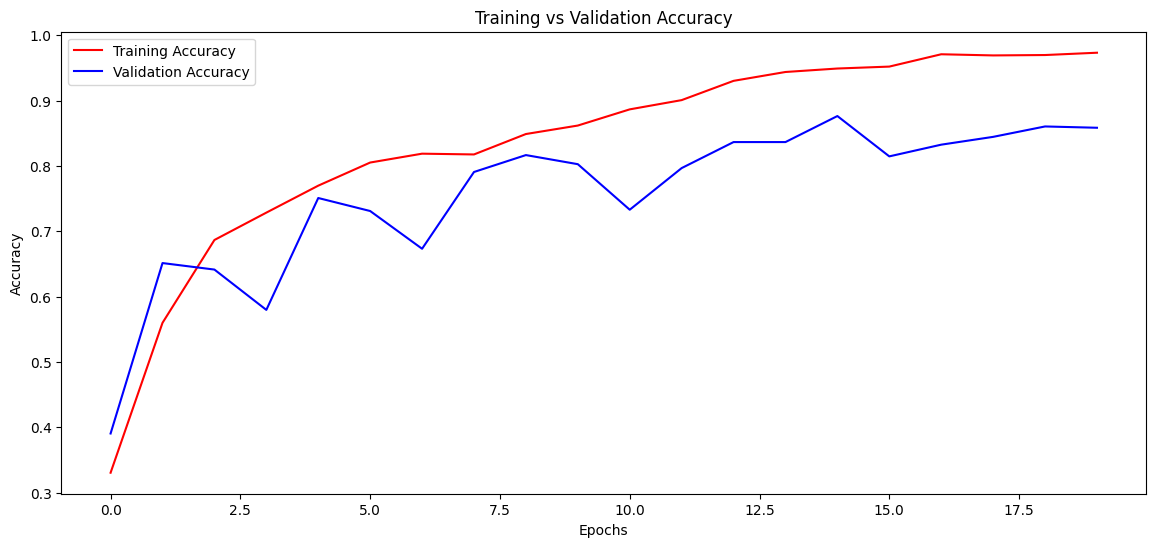

In [21]:
#model.save('braintumor.h5')
# Training history
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss    = history.history['loss']
val_loss= history.history['val_loss']
epochs  = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(14,6))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

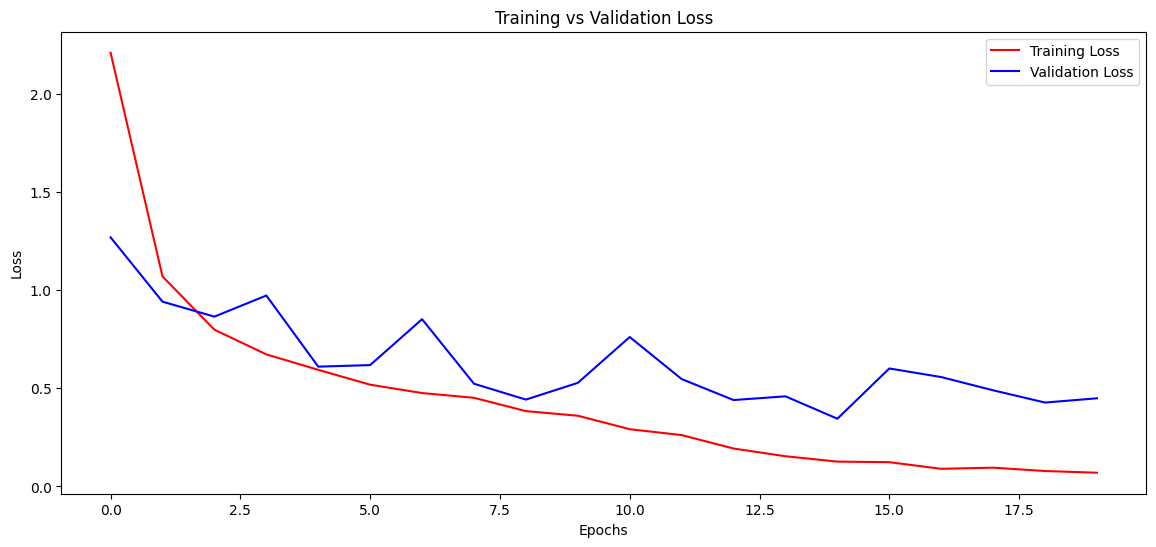

In [22]:
# Plot Loss
plt.figure(figsize=(14,6))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
//gh

# **Test the Model**

check 1 - meningioma

In [25]:
img = cv2.imread('/content/drive/MyDrive/Project_DataSets_GUVI/Tumour-20250909T193851Z-1-001/Tumour/train/meningioma/Tr-me_0551_jpg.rf.58c4d99195ebc75bb6af47123a856a97.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [26]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [27]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


np.int64(3)

check2 - glioma

In [28]:
img = cv2.imread('/content/drive/MyDrive/Project_DataSets_GUVI/Tumour-20250909T193851Z-1-001/Tumour/train/glioma/Tr-gl_0019_jpg.rf.6402e96f1a18221808a378aece0b4a5d.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [29]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [30]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


np.int64(0)

check3- no tumor

In [31]:
img = cv2.imread('/content/drive/MyDrive/Project_DataSets_GUVI/Tumour-20250909T193851Z-1-001/Tumour/train/no_tumor/Tr-no_0021_jpg.rf.660b878cd731bac20110b5135365001d.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [32]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [33]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


np.int64(2)

check 4 - pituitary

In [35]:
img = cv2.imread("/content/drive/MyDrive/Project_DataSets_GUVI/Tumour-20250909T193851Z-1-001/Tumour/train/pituitary/Tr-pi_0029_jpg.rf.2750d010652f4fd08d1c7049890817b7.jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [36]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [37]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


np.int64(3)